## Importing Necessary Libraries

In [1]:
# Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Extra
import warnings
warnings.filterwarnings(action="ignore")


## Data Loading

In [2]:
df=pd.read_csv("titanic_dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Information

In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.drop_duplicates().shape#No Duplicates

(891, 12)

## Missing Value Check

In [8]:
100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
# Any column having more than 40/50 % missing values, we can discard that column
df=df.drop('Cabin',axis=1)
#df.drop('Cabin',axis=1,inplace=True)

In [10]:
100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [11]:
# numerical --> Mean/Median (Median is always preferred as it is least affected with outliers)
# Categorical --> Mode

In [12]:
med=df["Age"].median()
df["Age"]=df["Age"].fillna(med)

In [13]:
100*df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [14]:
mod=df["Embarked"].mode()[0]
df["Embarked"]=df["Embarked"].fillna(mod)

In [15]:
100*df.isnull().mean()#Percentage of Missing values in each column

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

## Analysis

In [16]:
cont_cols=["Age","Fare"]#Continuous/Numerical Columns
cat_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]# Categorical/Discrete Columns
extra_cols=["PassengerId","Name","Ticket"]

## Univariate Analysis

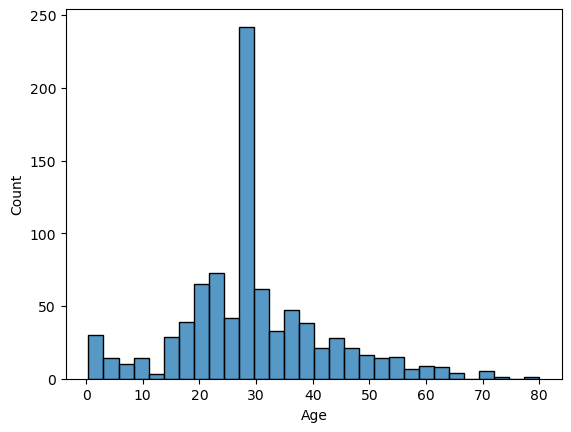

In [17]:
sns.histplot(df["Age"])
plt.show()

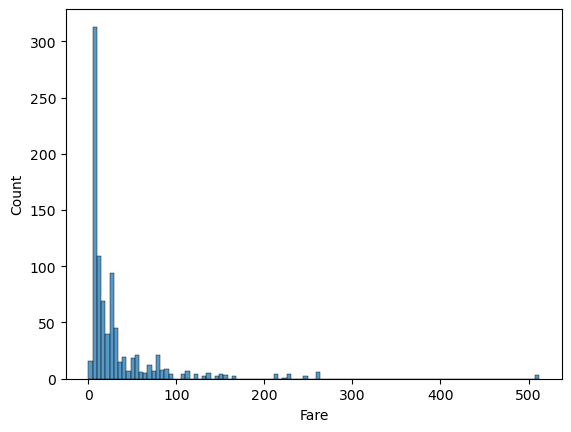

In [18]:
sns.histplot(df["Fare"])
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

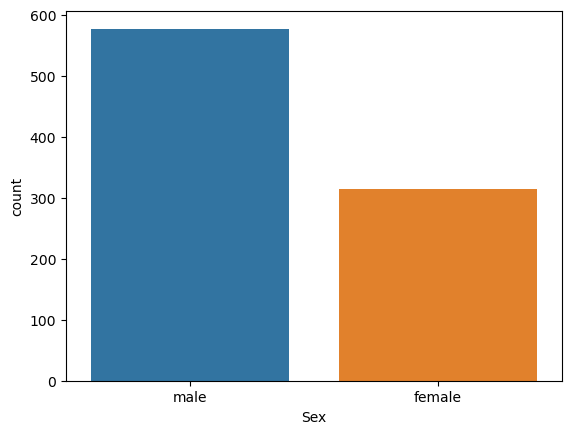

In [19]:
sns.countplot(df["Sex"])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

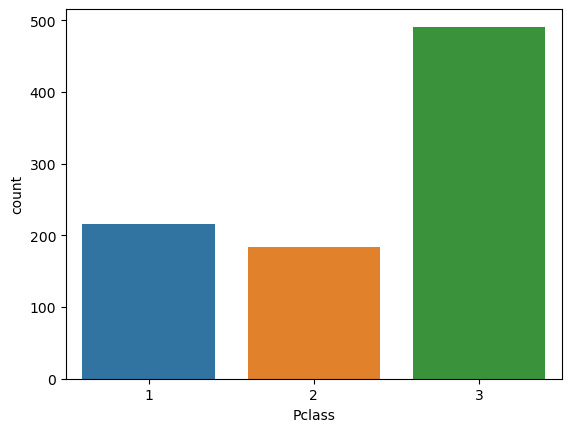

In [20]:
sns.countplot(df["Pclass"])

<AxesSubplot:xlabel='Parch', ylabel='count'>

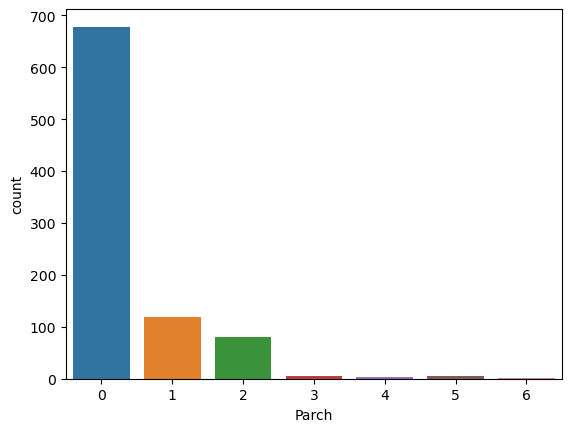

In [21]:
sns.countplot(df["Parch"])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

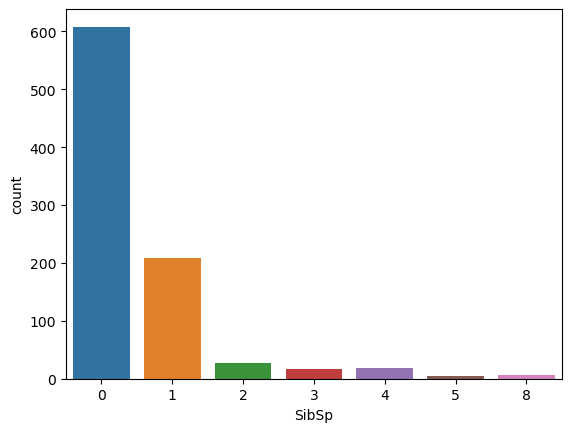

In [22]:
sns.countplot(df["SibSp"])

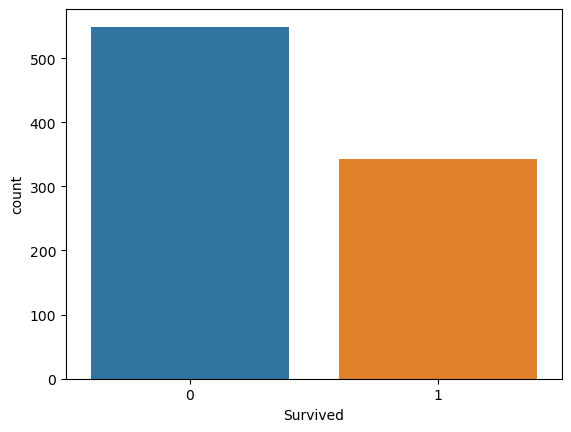

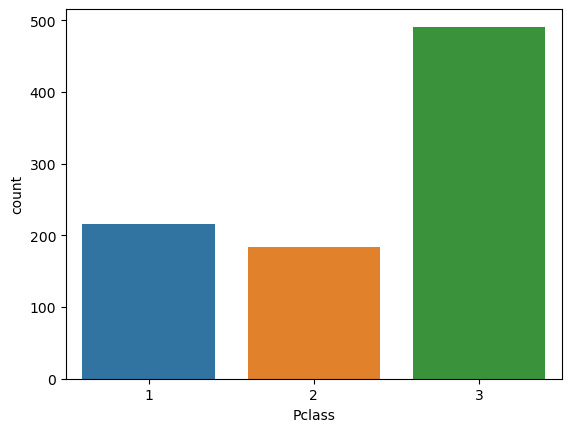

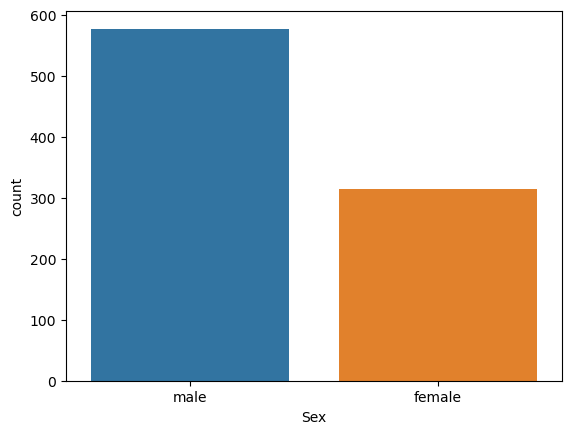

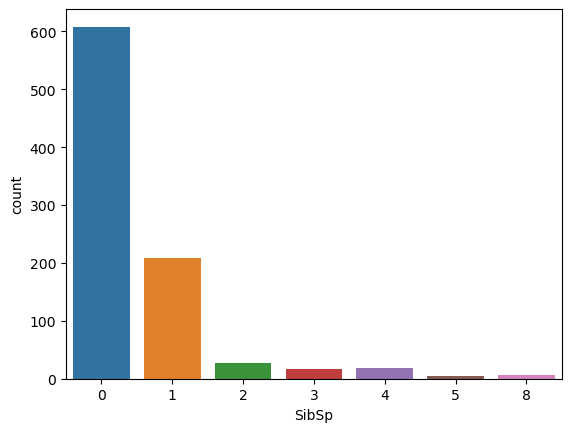

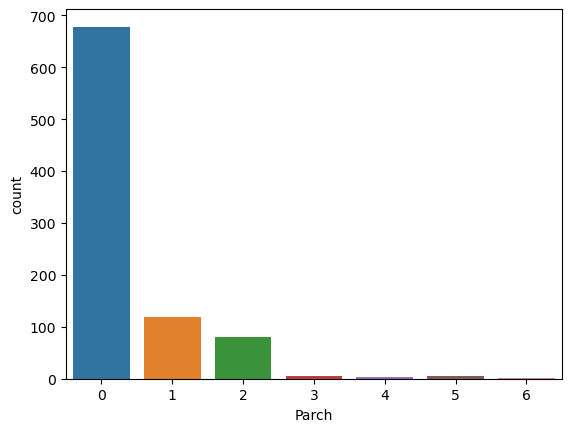

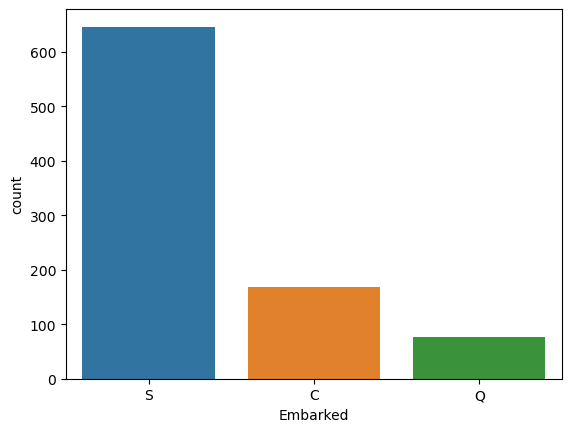

In [23]:
for col in cat_cols:
    sns.countplot(x=df[col])
    plt.show()

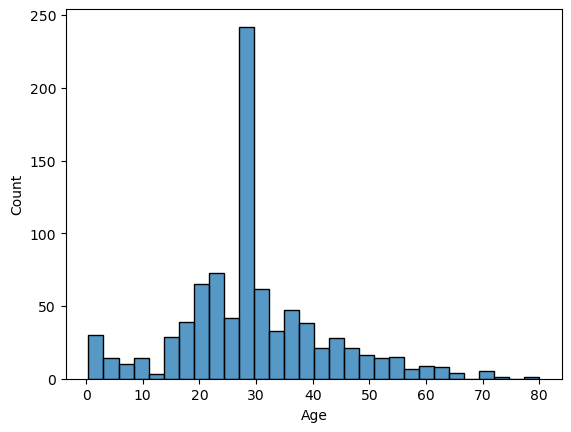

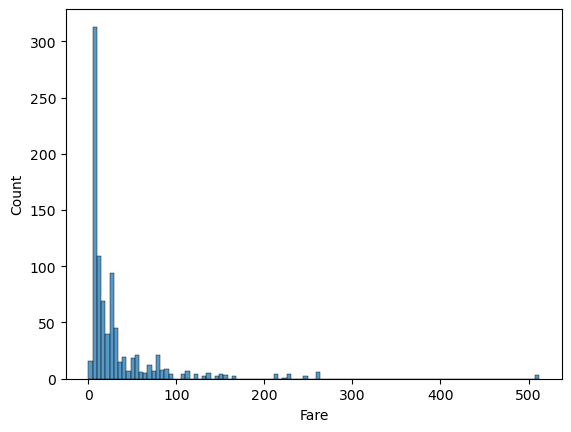

In [24]:
for col in cont_cols:
    sns.histplot(x=df[col])
    plt.show()

In [25]:
df[df["Fare"]<50].shape

(730, 11)

## Bivariate Analyis

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

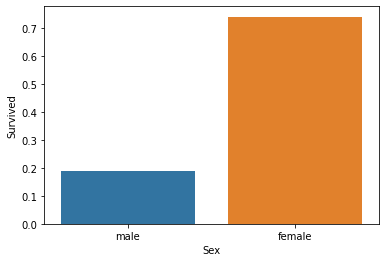

In [32]:
sns.barplot(x=df["Sex"],y=df["Survived"],ci=None)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

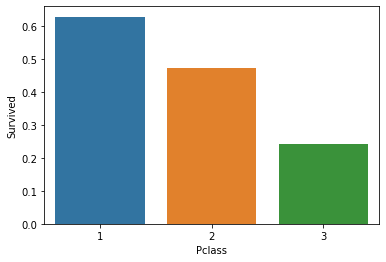

In [39]:
sns.barplot(x=df["Pclass"],y=df["Survived"],ci=None,estimator=np.mean)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

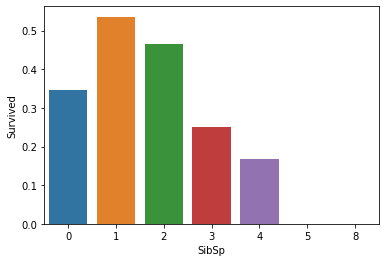

In [41]:
sns.barplot(x=df["SibSp"],y=df["Survived"],ci=None,estimator=np.mean)

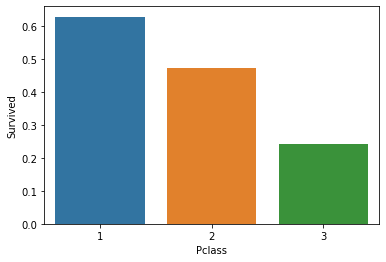

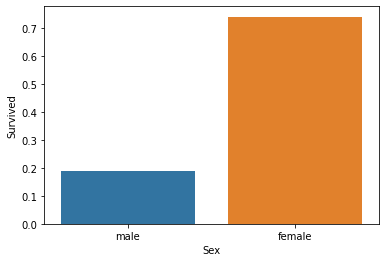

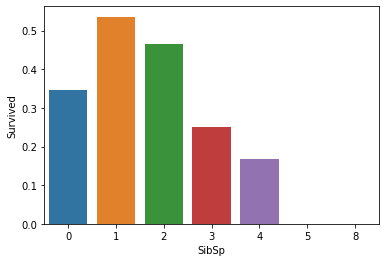

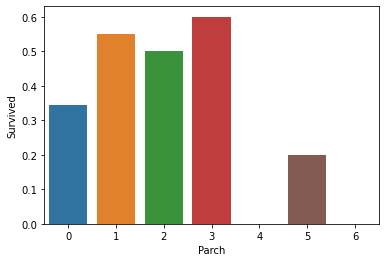

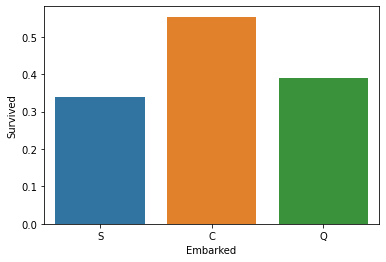

In [43]:
for col in cat_cols:
    if col!='Survived':
        sns.barplot(x=df[col],y=df["Survived"],ci=None)
        plt.show()

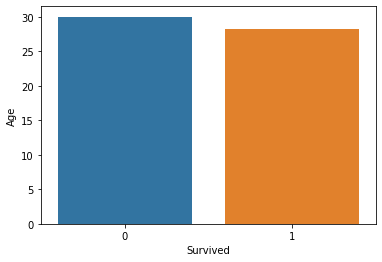

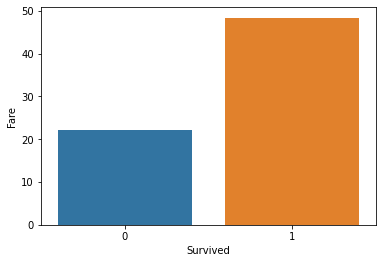

In [44]:
for col in cont_cols:
    sns.barplot(x=df["Survived"],y=df[col],ci=None)
    plt.show()

In [49]:
list(100*df["Pclass"].value_counts(normalize=True).values)

[55.106621773288445, 24.242424242424242, 20.65095398428732]

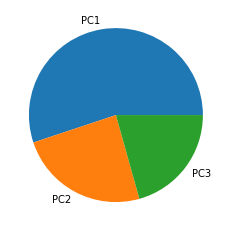

In [51]:
data=list(100*df["Pclass"].value_counts(normalize=True).values)
names=["PC1","PC2","PC3"]
plt.pie(data,labels=names)
plt.show()

------------------ Survived --------------------


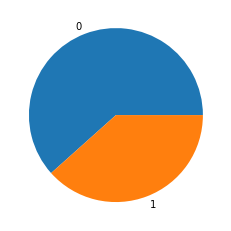

------------------ Pclass --------------------


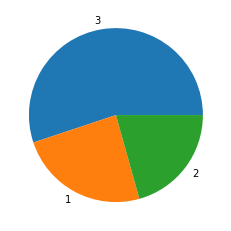

------------------ Sex --------------------


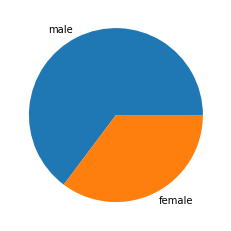

------------------ SibSp --------------------


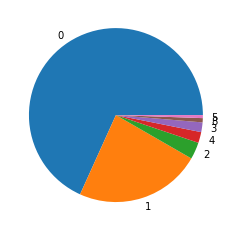

------------------ Parch --------------------


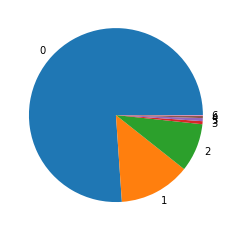

------------------ Embarked --------------------


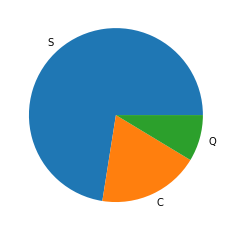

In [58]:
for col in cat_cols:
    print("------------------",col,"--------------------")
    data=list(100*df[col].value_counts(normalize=True).values)
    names=list(df[col].value_counts(normalize=True).index)
    plt.pie(data,labels=names)
    plt.show()

In [62]:
df["Age_Bucket"]=pd.cut(df["Age"],range(0,100,10))

<AxesSubplot:xlabel='Age_Bucket', ylabel='Survived'>

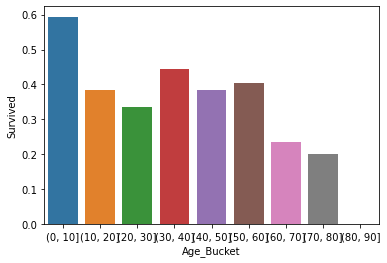

In [63]:
sns.barplot(x=df["Age_Bucket"],y=df["Survived"],ci=None,estimator=np.mean)